# 06/09/2021 - Ipsos Sopra-Steria

In [1]:
import numpy as np
import requests

import altair as alt
alt.data_transformers.enable('data_server')

from pollsposition.plots import stripplot, comparisonplot, sample_uncertainty


%load_ext autoreload
%autoreload 2

In [2]:
SONDAGE = '20210903_ipsos'

## Load the data

In [3]:
r = requests.get("https://raw.githubusercontent.com/pollsposition/data/main/presidentielles/sondages.json")
polls = r.json()

In [4]:
sondage = polls[SONDAGE]
num_interroges = sondage['echantillon']
hypotheses = sondage['hypotheses']

## Calculer les distributions postérieures

On choisit d'abord de voir le blanc/nul comme un candidat à part entière, on réajuste donc les pourcentages:

In [5]:
def inclure_non_exprimes(hypothese):
    resultats_bruts = hypothese['intentions']
    
    resultats = {}
    resultats['Blancs/Nul'] = 100 - hypothese['intentions_exprimees']
    for k,r in resultats_bruts.items():
        resultats[k] = hypothese['intentions_exprimees'] / 100 * r
        
    return resultats

In [6]:
subtitle = "Intentions de vote au premier tour des élections présidentielles 2022"
source = f"Ipsos-Sopra Steria pour franceinfo, Le Parisien et Aujourd'hui en France (06/09/2021)"

figures = {}
for key, name in hypotheses.items():
    resultats = inclure_non_exprimes(sondage['premier_tour'][key])
    posterior = sample_uncertainty(num_interroges, resultats, samples=1000)
    
    title = f"{name}"
    fig = stripplot(posterior, title=title, subtitle=subtitle, source=source, sort=None)
    figures[key] = fig

We can display the figures individually below:

In [7]:
figures['bertrand_zemmour']

alt.ConcatChart(...)

And save them in bulk:

In [8]:
for key, fig in figures.items():
    fig.save(f"resultats_distributions_{SONDAGE}_{key}.png", scale_factor=5.)

## Comparer les candidatures Pécresse, Bertrand et Barnier

### Si Eric Zemmour n'est pas candidat

In [9]:
resultats_comparaison = {
    'Xavier Bertrand': sondage['premier_tour']['bertrand']['intentions']['Xavier Bertrand'],
    'Valérie Pécresse': sondage['premier_tour']['pecresse']['intentions']['Valérie Pécresse'],
    'Michel Barnier': sondage['premier_tour']['barnier']['intentions']['Michel Barnier'],
}
posterior = sample_uncertainty(
    num_interroges,
    resultats_comparaison,
    len(sondage['premier_tour']['bertrand']['intentions']), # number of candidates
    samples=1000
)

title="Comparaison des candidats de la droite (sans Zemmour)"
plot = stripplot(posterior, title=title, subtitle=subtitle, source=source, sort=None, domain=[0,26])
plot.save(f"comparaison_candidats_droite_{SONDAGE}.png")
plot

alt.ConcatChart(...)

On calcule (et représente) la probabilité que Pécresse et Barnier fassent un meilleur score que Bertrand:

In [10]:
p_pecresse_greater = np.sum(posterior['Valérie Pécresse'] > posterior['Xavier Bertrand']) /  1_000
print(f"Il y a {100*p_pecresse_greater:.1f}% de chance que Valérie Pécresse réunisse plus d'intentions de votes.")

Il y a 34.5% de chance que Valérie Pécresse réunisse plus d'intentions de votes.


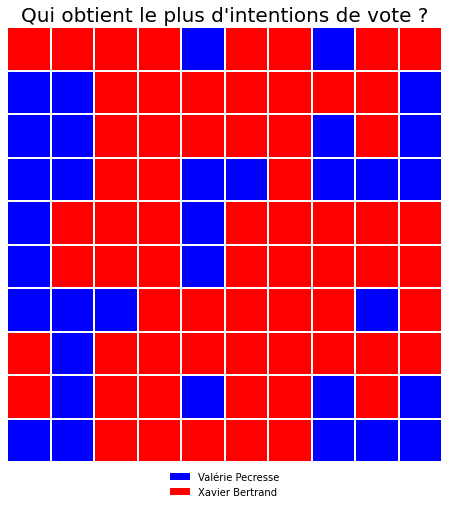

In [11]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.patches import Patch
import numpy as np

# data
num_pecresse = int(100*p_pecresse_greater)
data = np.array([1] * num_pecresse + (100-num_pecresse) * [0])
np.random.shuffle(data)
data = data.reshape((10,10))

# create discrete colormap
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,0.5,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='white', linewidth=2)
ax.set_xticks(np.arange(-.5, 10, 1));
ax.set_yticks(np.arange(-.5, 10, 1));
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
for tic in ax.xaxis.get_major_ticks():
    tic.tick1line.set_visible(False)
for tic in ax.yaxis.get_major_ticks():
    tic.tick1line.set_visible(False)

# legend
legend_elements = [Patch(facecolor='blue', label='Valérie Pecresse'), Patch(facecolor='red', label='Xavier Bertrand')]
ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5,-.1), frameon=False)

# title
plt.title("Qui obtient le plus d'intentions de vote ?", fontsize=20)
    
plt.show()

In [12]:
p_barnier_greater = np.sum(posterior['Michel Barnier'] > posterior['Xavier Bertrand']) /  1_000
print(f"Il y a {100*p_barnier_greater:.1f}% de chance que Michel Barnier réunisse plus d'intentions de votes.")

Il y a 3.4% de chance que Michel Barnier réunisse plus d'intentions de votes.


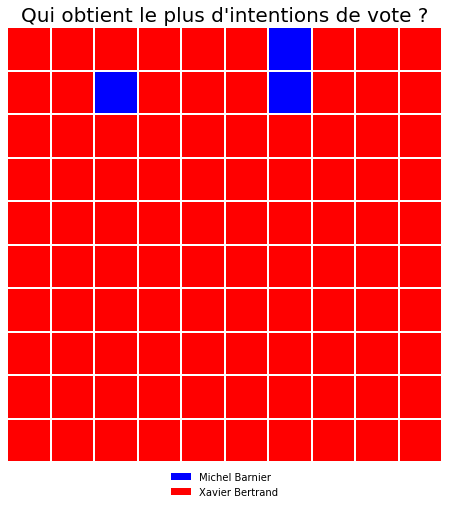

In [13]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.patches import Patch
import numpy as np

# data
num_barnier = int(100*p_barnier_greater)
data = np.array([1] * num_barnier + (100-num_barnier) * [0])
np.random.shuffle(data)
data = data.reshape((10,10))

# create discrete colormap
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,0.5,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='white', linewidth=2)
ax.set_xticks(np.arange(-.5, 10, 1));
ax.set_yticks(np.arange(-.5, 10, 1));
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
for tic in ax.xaxis.get_major_ticks():
    tic.tick1line.set_visible(False)
for tic in ax.yaxis.get_major_ticks():
    tic.tick1line.set_visible(False)

# legend
legend_elements = [Patch(facecolor='blue', label='Michel Barnier'), Patch(facecolor='red', label='Xavier Bertrand')]
ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5,-.1), frameon=False)

# title
plt.title("Qui obtient le plus d'intentions de vote ?", fontsize=20)
    
plt.show()

### Si Zemmour est candidat

In [14]:
resultats_comparaison = {
    'Xavier Bertrand': sondage['premier_tour']['bertrand_zemmour']['intentions']['Xavier Bertrand'],
    'Valérie Pécresse': sondage['premier_tour']['pecresse_zemmour']['intentions']['Valérie Pécresse'],
    'Michel Barnier': sondage['premier_tour']['barnier_zemmour']['intentions']['Michel Barnier'],
}
posterior = sample_uncertainty(
    num_interroges,
    resultats_comparaison,
    len(sondage['premier_tour']['bertrand']['intentions']), # number of candidates
    samples=1000
)

title="Comparaison des candidats de la droite (avec Zemmour)"
plot = stripplot(posterior, title=title, subtitle=subtitle, source=source, sort=None, domain=[0,26])
plot.save(f"comparaison_candidats_droite_{SONDAGE}_zemmour.png")
plot

alt.ConcatChart(...)

## Impact de la candidature d'Eric Zemmour

Le sondage amène naturellement à comparer les situations avec/sans Eric Zemmour.

In [15]:
comparison = comparisonplot(
    sondage['premier_tour']['bertrand']['intentions'],
    sondage['premier_tour']['bertrand_zemmour']['intentions'],
    title="Hypothèse Bertrand: impact de la candidature d'Eric Zemmour",
    subtitle="Sur les intentions de votes des candidats. En points de pourcentage",
    source=source,
)
comparison.save(f"impact_zemmour_bertrand_{SONDAGE}.png", scalefactor=5)
comparison

alt.ConcatChart(...)

In [16]:
comparison = comparisonplot(
    sondage['premier_tour']['pecresse']['intentions'],
    sondage['premier_tour']['pecresse_zemmour']['intentions'],
    title="Hypothèse Pécresse: impact de la candidature d'Eric Zemmour",
    subtitle="Sur les intentions de votes des candidats. En points de pourcentage",
    source=source,
)
comparison.save(f"impact_zemmour_pecresse_{SONDAGE}.png", scalefactor=5)
comparison

alt.ConcatChart(...)

In [17]:
comparison = comparisonplot(
    sondage['premier_tour']['barnier']['intentions'],
    sondage['premier_tour']['barnier_zemmour']['intentions'],
    title="Hypothèse Barnier: impact de la candidature d'Eric Zemmour",
    subtitle="Sur les intentions de votes des candidats. En points de pourcentage",
    source=source,
)
comparison.save(f"impact_zemmour_barnier_{SONDAGE}.png", scalefactor=5)
comparison

alt.ConcatChart(...)